<a href="https://colab.research.google.com/github/biswa-13/DataScience/blob/master/DS1_Explorative_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here in this tutorial we are goin to learn 
# - how to use seaborn and pyplotlib visualization feature to know your data
# - how to determine the various relationship beteen the feature vectors 
# - how to handle the null values and how to clean your dataset
# - how to convert the categorical features into numerical features
# - how to prepare train_test dataset
# - how to use logistic regression
# - how to predict the accuracy using the confusion_matrix & accuraccy_score
# we have used titanic dataset for doing the prediction of survivals available in "Survived" columns
# this is a Explorative Data Analysis demo .
# References:
# - youtube link : https://www.youtube.com/watch?v=Ea_KAcdv1vs&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=13
# - github link : https://github.com/krishnaik06/EDA1

In [1]:
# importing the required libraried

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
print("Finish: importing the required libraried")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Finish: importing the required libraried


In [2]:
# downloading the titanic dataset
titanic_ds = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv")

In [3]:
# various methods to see the structure of the dataset
titanic_ds.head()
# titanic_ds.describe()
# titanic_ds.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


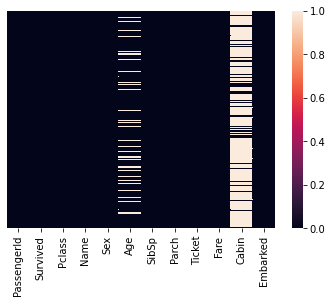

In [4]:
# using heatmap to determine the null values
sbn.heatmap(titanic_ds.isnull(), yticklabels=False)

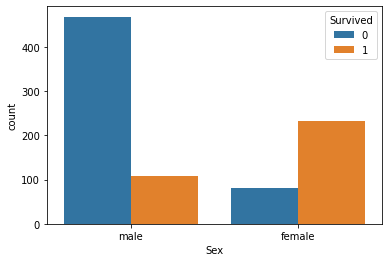

In [5]:
# using the countplot on gender column to see the relationship between the sex and the survival

sbn.countplot(x="Sex", hue="Survived",data= titanic_ds)

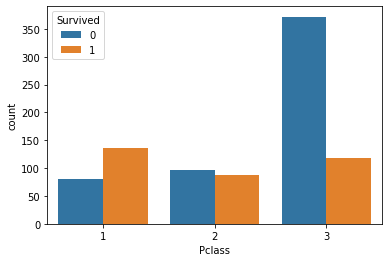

In [6]:
# using the countplot on Pclass column to see the relationship between the Embarked and the Survived

sbn.countplot(x="Pclass", hue="Survived", data=titanic_ds)

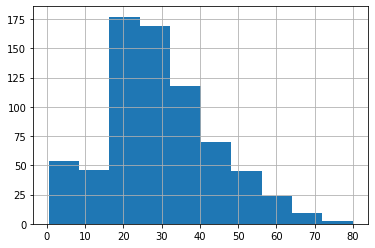

In [7]:
# draw a histogram on the age column to know the distibution
titanic_ds["Age"].hist()

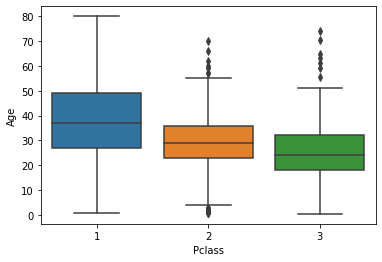

In [8]:
# trying to replace the null values in "Age" column by doing an boxplot anlysis of "Age" with respect to "Pclass"
sbn.boxplot(x="Pclass", y="Age", data=titanic_ds)

In [9]:
# from the above box plot the middle line of each box represents the 50% or the average age of the peoples belongs to each class
# for example the avg age of class1 people is some where around 36, class2 is 28, class3 is 24
# now lets replace the null values with the calculated average values according to the class

def impute_age_wrt_pclass(cols):
  age = cols[0]
  pclass = cols[1]
  if(pd.isnull(age)):
    if(pclass == 1):
      return 36
    elif(pclass == 2):
      return 28
    else:
      return 24
  else:
    return age
print("Finish: defining the imputation method()")


Finish: defining the imputation method()


In [12]:
# performing the imputation on the missing values of the "Age"
titanic_ds["Age"] = titanic_ds[['Age','Pclass']].apply(impute_age_wrt_pclass, axis=1)
print("Finish: performing the imputation on the missing values of the Age")
titanic_ds.info()

Finish: performing the imputation on the missing values of the Age
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


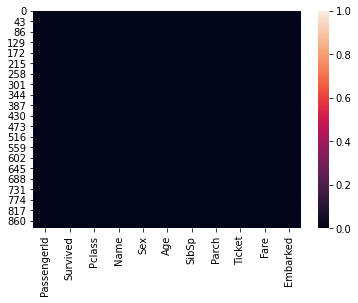

In [13]:
# we are going to remove the "cabin" column because it contains so many null values and it's not goin to play any imp role in our prediction
titanic_ds.drop(["Cabin"], inplace= True, axis=1)

# validating if the null values has been replaced by the new values using the heatmap
sbn.heatmap(titanic_ds.isnull())

In [15]:
# droping the na 
titanic_ds.info()
titanic_ds.dropna(inplace=True)
titanic_ds.info()
print("Finish: droping the na ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass  

In [16]:


# converting the categiracal column (Sex, Embarked) into the numerical values and other 
# categorical columns(Name, passengerId,Ticket) are not plays any importenat roles in our prediction so going to remove them  in the future
sex = pd.get_dummies(titanic_ds["Sex"], drop_first= True)
sex
embarked = pd.get_dummies(titanic_ds['Embarked'], drop_first=True)
embarked
titanic_ds.drop(["Sex","Embarked","PassengerId","Name","Ticket"], axis=1, inplace=True)
print("Finish: Conversion of categorical values to the numerical values")

Finish: Conversion of categorical values to the numerical values


In [17]:
titanic_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 48.6 KB


In [20]:
# adding the newly created numerical/feature column to the existing dataset
# titanic_ds.drop(["Q","S","male","Ticket"], axis=1, inplace=True)
titanic_ds = pd.concat([titanic_ds, sex, embarked], axis = 1)

titanic_ds.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [21]:
# creating training and testing dataset
input_train, input_test, output_train, output_test = train_test_split(
    titanic_ds.drop(["Survived"], axis=1),
    titanic_ds["Survived"] ,
    test_size= .30,
    random_state= 101
)

print("Finish: creating training and testing dataset")

Finish: creating training and testing dataset


In [27]:
# reviewing the newly created train/test datasets
# input_train.info()
# output_train.info()
# input_test.info()
# len(output_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 511 to 634
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  267 non-null    int64  
 1   Age     267 non-null    float64
 2   SibSp   267 non-null    int64  
 3   Parch   267 non-null    int64  
 4   Fare    267 non-null    float64
 5   male    267 non-null    uint8  
 6   Q       267 non-null    uint8  
 7   S       267 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 13.3 KB


267

In [28]:
# now training the model using the training dataset
logModel = LogisticRegression()
logModel.fit(input_train, output_train)
print("Finish: training the model using the training dataset")

Finish: training the model using the training dataset


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
# doing the prediction
predict_result = logModel.predict(input_test)
print("Finish: doing the prediction")

In [33]:
# calculating the accuracy using the confusion matrix
conf_matrix = confusion_matrix(output_test,predict_result)
print(conf_matrix)

print("Finish:calculating the accuracy using the confusion matrix")

[[148  15]
 [ 31  73]]
Finish:calculating the accuracy using the confusion matrix


In [40]:
# calculating the accuracy_Score
acrcy_score = accuracy_score(output_test, predict_result)
print("Final Model Accuracy is: {}".format(acrcy_score))

Final Model Accuracy is: 0.8277153558052435
